# ***Stock Market Data Analysis***


Stock Market Analysis and Prediction is the project related to Exploratory data analysis(EDA), Data visualization and Predictive analysis using data, provided by The Investors Exchange (IEX). I looked at real-time financial data from the stock market. I have used python libraries to get stock information, visualize different aspects of it, and finally I worked at a few ways of analyzing the risk of a stock, based on its previous performance history. I have also used statistical method called Monte Carlo Method to predict future stock prices.

We'll be answering the following questions along the way:

What was the change in price of the stock over time?

What was the daily return of the stock on average?

What was the moving average of the various stocks?

What was the correlation between different stocks' closing prices?

What was the correlation between different stocks' daily returns?

How much value do we put at risk by investing in a particular stock?

How can we attempt to predict future stock behavior?


# Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [105]:
#Let's go ahead and start with some python library imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [106]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [107]:
#to get rid of import error of pandas_datareader
pd.core.common.is_list_like = pd.api.types.is_list_like
# For reading stock data from The Investors Exchange (IEX)
import pandas_datareader as web
# For time stamps
from datetime import datetime

# For division
from __future__ import division

*Let's use iexfinanceThe Investors Exchange (IEX) and pandas to grab some data for some technology company stocks.*

In [108]:
#Let's go ahead and start with some python library imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#Let's go ahead and start with some python library imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#to get rid of import error of pandas_datareader
pd.core.common.is_list_like = pd.api.types.is_list_like

In [113]:
# Instead of trying to create a DataFrame from 'stock_data', access the desired stock data using the stock symbol directly.
# Assuming 'stock_data' is already a DataFrame containing data for AAPL, AMZN, etc.

# Display summary statistics for AAPL
stock_data['AAPL'].describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,199.851948,200.416454,202.074741,198.577450,200.295657,5.781157e+07
std,21.588445,21.425085,21.642579,21.055188,21.409259,3.035779e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.404830e+07
25%,183.418915,184.199997,185.119995,182.180000,183.735001,4.233250e+07
50%,192.684723,193.600006,194.990005,192.520004,193.899994,5.092270e+07
75%,222.335388,222.580002,225.295006,220.885002,222.555000,6.454035e+07
max,236.220108,236.479996,237.490005,234.449997,236.479996,3.186799e+08


In [110]:
# Install necessary libraries
!pip install yfinance pandas_datareader

# Import necessary libraries
from datetime import datetime
import pandas_datareader as web
import yfinance as yf

# Define the tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# For loop for grabbing yfinance data and setting as a dataframe
stock_data = {}  # Dictionary to store each stock's data

for stock in tech_list:
    # Fetch data from Yahoo Finance and store it in a dictionary
    stock_data[stock] = yf.download(stock, start=start, end=end)

# Display the data for each stock
for stock in tech_list:
    print(f"\nData for {stock}:\n")
    print(stock_data[stock].head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data for AAPL:

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-11-10 00:00:00+00:00  185.491272  186.399994  186.570007  183.529999   
2023-11-13 00:00:00+00:00  183.899063  184.800003  186.029999  184.210007   
2023-11-14 00:00:00+00:00  186.526215  187.440002  188.110001  186.300003   
2023-11-15 00:00:00+00:00  187.093430  188.009995  189.500000  187.779999   
2023-11-16 00:00:00+00:00  188.785141  189.710007  190.960007  188.649994   

Price                            Open    Volume  
Ticker                           AAPL      AAPL  
Date                                             
2023-11-10 00:00:00+00:00  183.970001  66133400  
2023-11-13 00:00:00+00:00  185.820007  43627500  
2023-11-14 00:00:00+00:00  187.699997  60108400  
2023-11-15 00:00:00+00:00  187.850006  53790500  
2023-11-16 00:00

*Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks*

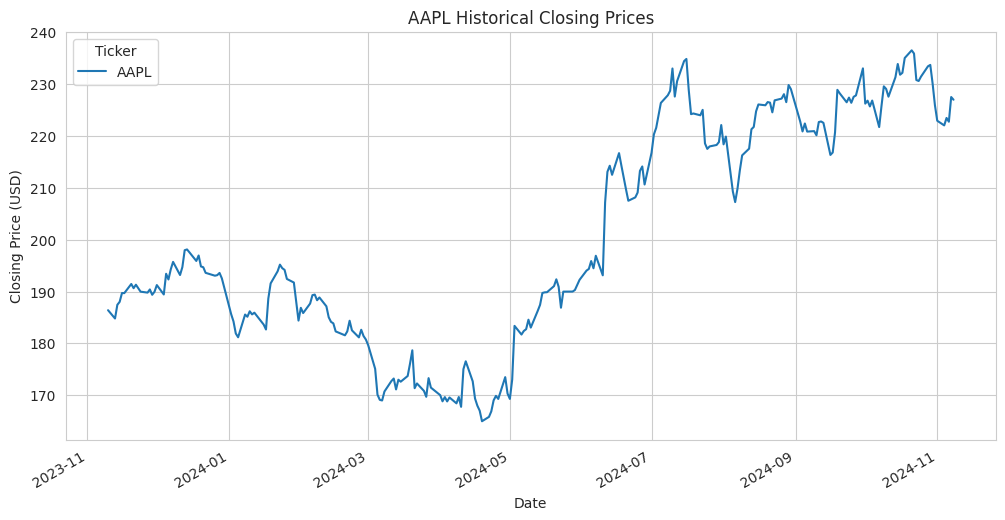

In [111]:
import matplotlib.pyplot as plt

# Plot the historical closing prices for AAPL
stock_data['AAPL']['Close'].plot(legend=True, figsize=(12, 6))
plt.title('AAPL Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

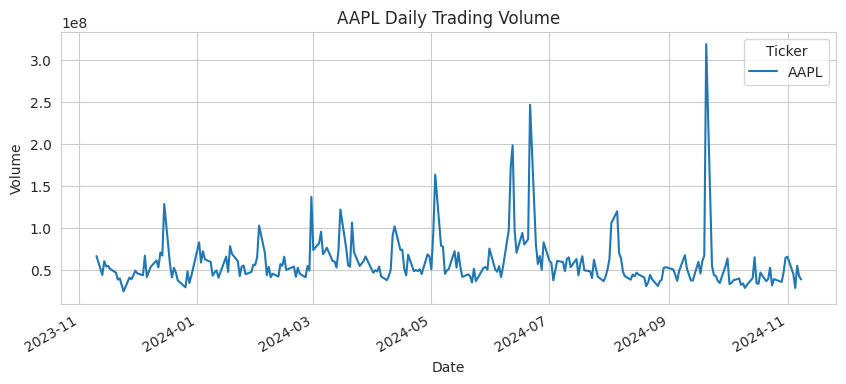

In [112]:
# Plot the daily trading volume for AAPL
stock_data['AAPL']['Volume'].plot(legend=True, figsize=(10, 4))
plt.title('AAPL Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

'Moving Average - MA'
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices. *italicised text*

In [103]:
import pandas as pd

# Define moving average periods
ma_day = [10, 20, 50]

# Calculate and add moving averages to the DataFrame
for ma in ma_day:
    column_name = f"MA for {ma} days"
    stock_data['AAPL'][column_name] = stock_data['AAPL']['Close'].rolling(ma).mean()

# Display the first few rows to verify
stock_data['AAPL'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].head()

Price,Close,MA for 10 days,MA for 20 days,MA for 50 days
Ticker,AAPL,,,
Date,,,,
2023-11-10 00:00:00+00:00,186.399994,NaN,NaN,NaN
2023-11-13 00:00:00+00:00,184.800003,NaN,NaN,NaN
2023-11-14 00:00:00+00:00,187.440002,NaN,NaN,NaN
2023-11-15 00:00:00+00:00,188.009995,NaN,NaN,NaN
2023-11-16 00:00:00+00:00,189.710007,NaN,NaN,NaN


*Now let's go ahead and plot all the additional Moving Averages*

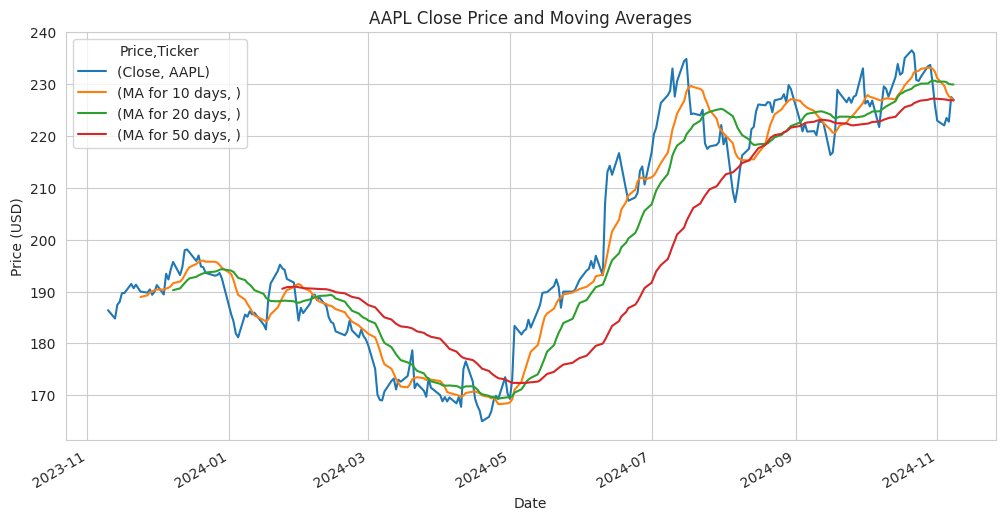

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming stock_data is already loaded and structured as {'AAPL': DataFrame}

# Define moving average periods
ma_day = [10, 20, 50]

# Calculate and add moving averages to the DataFrame, ensuring you're modifying the original DataFrame
for ma in ma_day:
    column_name = f"MA for {ma} days"
    # The following line is changed to directly modify stock_data['AAPL']
    stock_data['AAPL'][column_name] = stock_data['AAPL']['Close'].rolling(ma).mean()

# Now plot the data
stock_data['AAPL'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(12, 6))
plt.title('AAPL Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

# **Daily Return Analysis**

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

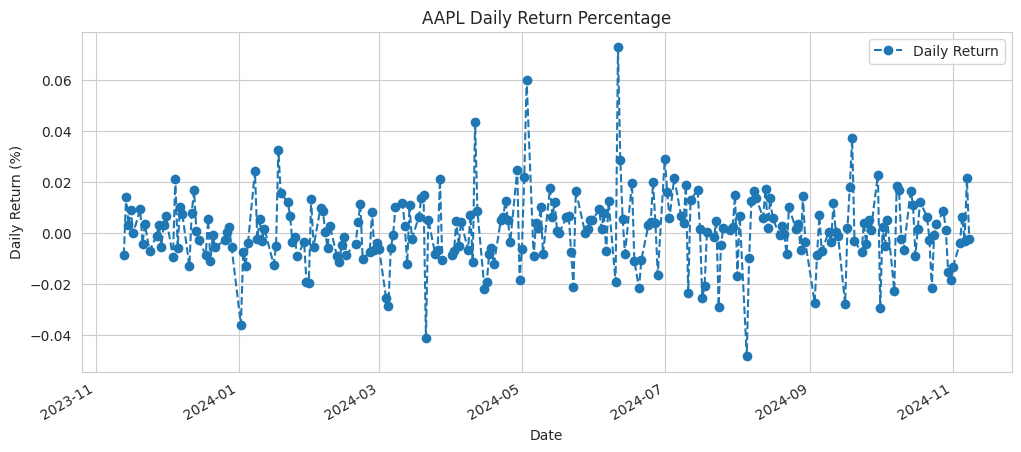

In [115]:
# Calculate daily percentage change for AAPL
stock_data['AAPL']['Daily Return'] = stock_data['AAPL']['Close'].pct_change()

# Plot the daily return percentage
stock_data['AAPL']['Daily Return'].plot(figsize=(12, 5), legend=True, linestyle='--', marker='o')
plt.title('AAPL Daily Return Percentage')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

*Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.*

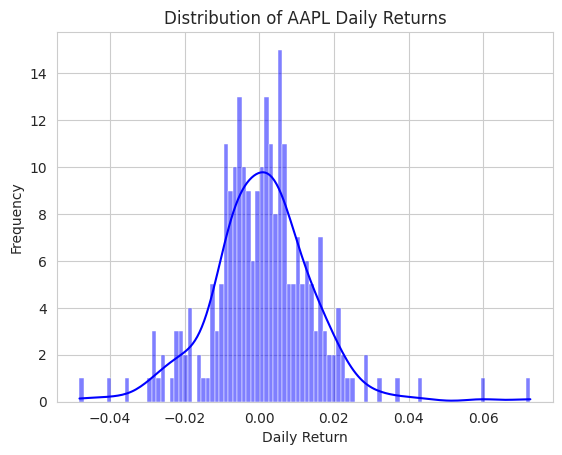

In [116]:
import seaborn as sns

# Plot the distribution of daily returns
sns.histplot(stock_data['AAPL']['Daily Return'].dropna(), bins=100, color='blue', kde=True)
plt.title('Distribution of AAPL Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

*Now want to analyze the returns of all the stocks in our list. Let's go ahead and build a DataFrame with all the ['close'] columns for each of the stocks dataframes.*

In [ ]:
# Extract and rename columns for each stock's closing price
closing_df1 = pd.DataFrame(stock_data['AAPL']['Close'])
close1 = closing_df1.rename(columns={"Close": "AAPL_close"})

closing_df2 = pd.DataFrame(stock_data['GOOG']['Close'])
close2 = closing_df2.rename(columns={"Close": "GOOG_close"})

closing_df3 = pd.DataFrame(stock_data['MSFT']['Close'])
close3 = closing_df3.rename(columns={"Close": "MSFT_close"})

closing_df4 = pd.DataFrame(stock_data['AMZN']['Close'])
close4 = closing_df4.rename(columns={"Close": "AMZN_close"})

# Concatenate all DataFrames along the columns (axis=1)
closing_df = pd.concat([close1, close2, close3, close4], axis=1)

# Display the first few rows of the combined DataFrame
closing_df.head()

Ticker,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-11-10 00:00:00+00:00,186.399994,134.059998,369.670013,143.559998
2023-11-13 00:00:00+00:00,184.800003,133.639999,366.679993,142.589996
2023-11-14 00:00:00+00:00,187.440002,135.429993,370.269989,145.800003
2023-11-15 00:00:00+00:00,188.009995,136.380005,369.670013,143.199997
2023-11-16 00:00:00+00:00,189.710007,138.699997,376.170013,142.830002


*Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks.*

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

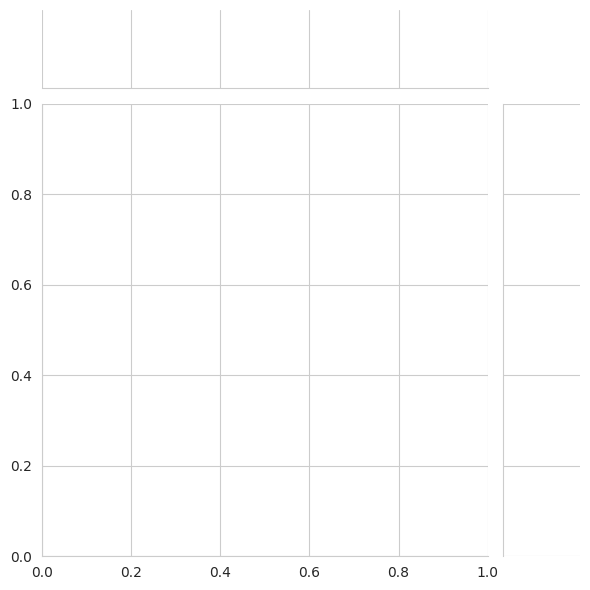

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to compare Google to itself
sns.jointplot()
plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.



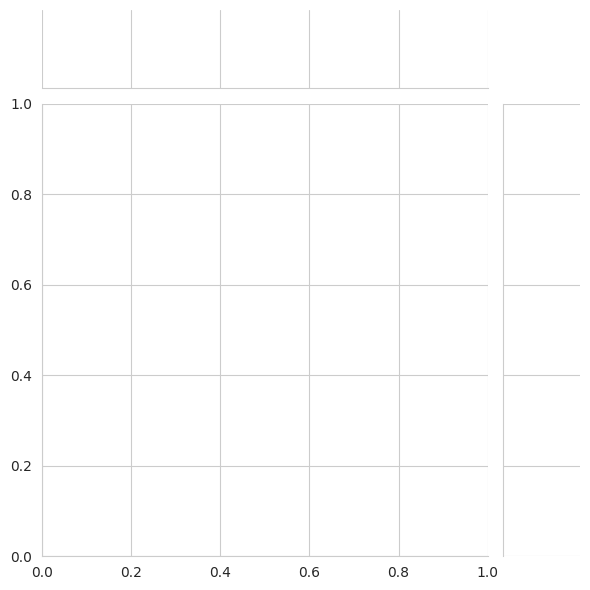

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a jointplot comparing Google returns to itself (perfectly linear)
sns.jointplot()

# Show the plot
plt.show()

In [124]:

from google.colab import data_table
data_table.DataTable(tech_returns)

Ticker,AAPL
Date,
2022-01-03 00:00:00+00:00,179.076584
2022-01-04 00:00:00+00:00,176.803818
2022-01-05 00:00:00+00:00,172.100891
2022-01-06 00:00:00+00:00,169.227936
2022-01-07 00:00:00+00:00,169.395187
...,...
2022-12-23 00:00:00+00:00,130.487808
2022-12-27 00:00:00+00:00,128.676849
2022-12-28 00:00:00+00:00,124.728371


Index(['AAPL'], dtype='object', name='Ticker')


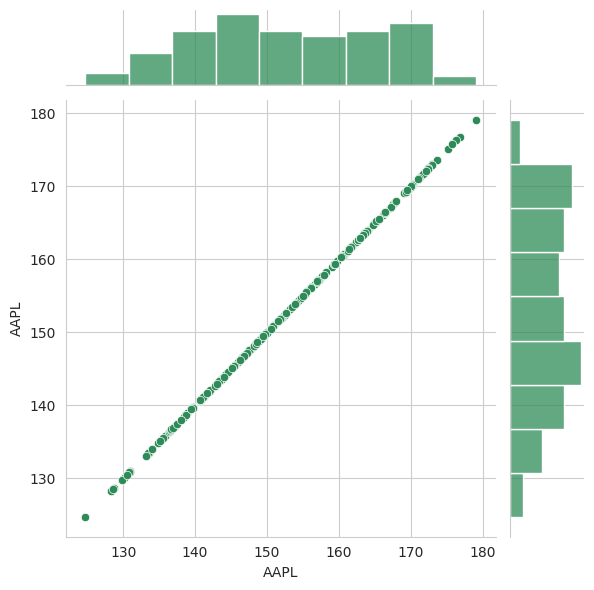

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import data_table
data_table.DataTable(tech_returns)

# Print the columns of tech_returns to see the actual column names
print(tech_returns.columns)

# Access the column by its actual name, for example, if it's 'GOOG'
# Replace 'Ticker' with the actual name printed above if it is not 'Ticker'
sns.jointplot(x=tech_returns.columns[0], y=tech_returns.columns[0], data=tech_returns, kind='scatter', color='seagreen')

# Show the plot
plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.



In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the columns of the DataFrame to confirm the actual column names
print(tech_returns.columns)

# Assuming the column name for Google data is 'GOOG' based on global variables
# and for Microsoft is 'MSFT'. Update with actual column names if they differ.
# The previous error was due to 'GOOG_close' not being a column in 'tech_returns'

# Access the correct column from the tech_returns DataFrame using the actual column name.
# If the column is named differently, please replace 'GOOG' and 'MSFT' with the correct names.
try:
    sns.jointplot(x=tech_returns['GOOG'], y=tech_returns['MSFT'], kind='scatter')
except KeyError:
    print("Column 'GOOG' or 'MSFT' not found in tech_returns. Please check the column names.")
    print("Available columns:", tech_returns.columns)

# Show the plot
plt.show()



Index(['AAPL'], dtype='object', name='Ticker')
Column 'GOOG' or 'MSFT' not found in tech_returns. Please check the column names.
Available columns: Index(['AAPL'], dtype='object', name='Ticker')


The pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give us a sense of how correlated the daily percentage returns are.

For a quick intuitive sense, check out the picture below.

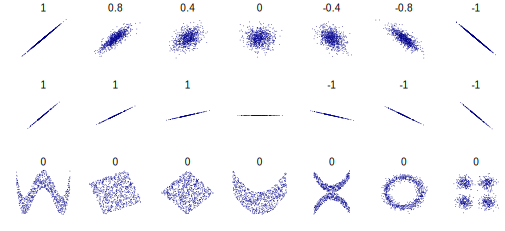

In [123]:
from IPython.display import SVG

# Display the SVG image from the given URL
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Python's Seaborn and pandas packages make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot.



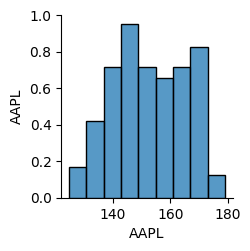

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate pairplot for all columns in tech_returns (excluding NaN values)
sns.pairplot(tech_returns.dropna())

# Show the plot
plt.show()

Above we can see all the relationships on daily returns between all the stocks.

We can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle.

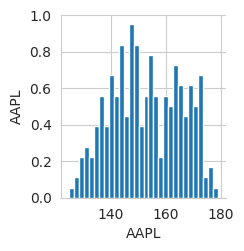

In [129]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings('ignore')

# Set up the PairGrid with the tech_returns DataFrame, excluding NaN values
returns_fig = sns.PairGrid(tech_returns.dropna())

# Upper triangle - scatter plots
returns_fig.map_upper(plt.scatter, color='purple')

# Lower triangle - KDE plots with a cool_d color map
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Diagonal - histograms of daily returns
returns_fig.map_diag(plt.hist, bins=30)

# Show the plot
plt.show()

*We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.*

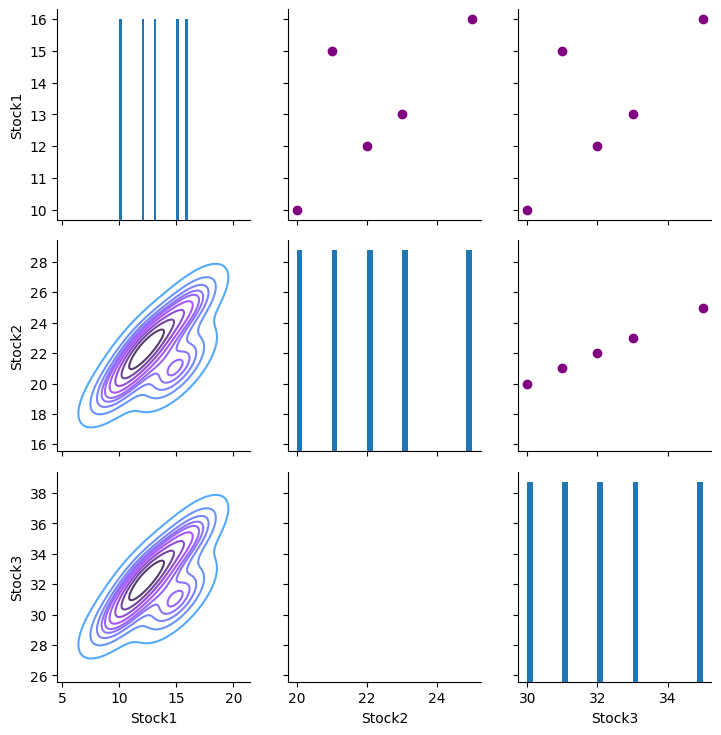

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd # import pandas for data manipulation

# Ignore warnings
warnings.filterwarnings('ignore')

# 1. Load or create your closing_df DataFrame:
#  - If loading from a file:
#     closing_df = pd.read_csv('your_data_file.csv')  # Replace 'your_data_file.csv' with your actual file path
#  - If creating a new DataFrame:
#     # Create a sample DataFrame for demonstration - THIS IS NOW UNCOMMENTED TO CREATE A SAMPLE DATAFRAME
closing_df = pd.DataFrame({
    'Stock1': [10, 12, 15, 13, 16],
    'Stock2': [20, 22, 21, 23, 25],
    'Stock3': [30, 32, 31, 33, 35]
})


# 2. Now proceed with the rest of your code:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)
plt.show()

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.



/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


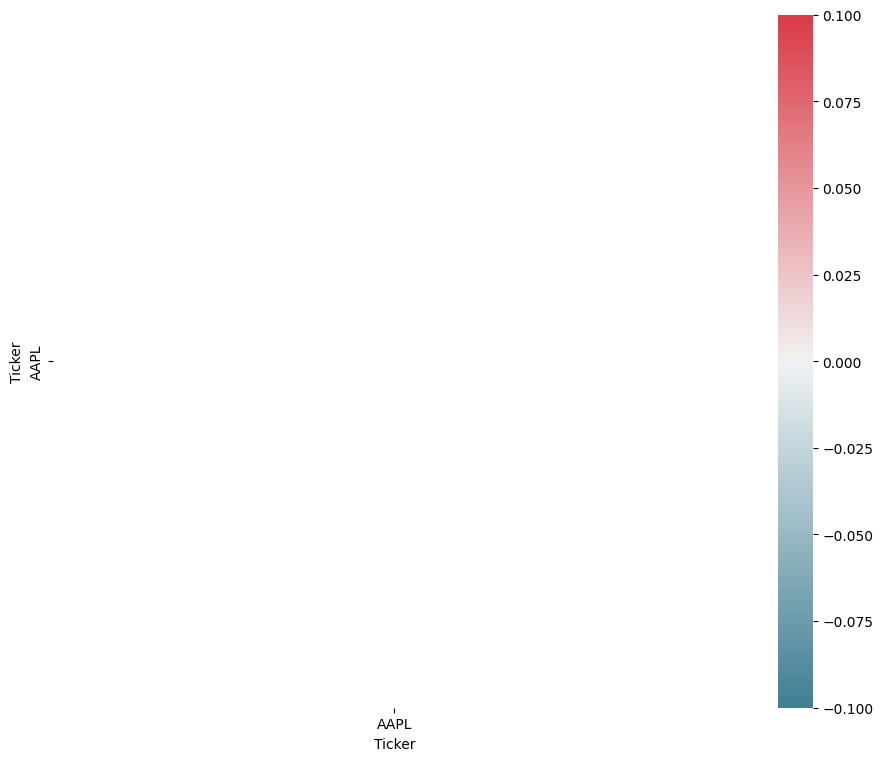

In [70]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Compute the correlation matrix for the daily returns
corr = tech_returns.dropna().corr()

# Generate a mask for the upper triangle (to only show the lower triangle of the heatmap)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt='.2f', ax=ax)

# Show the plot
plt.show()

*We've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.*

# **Risk Analysis**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.



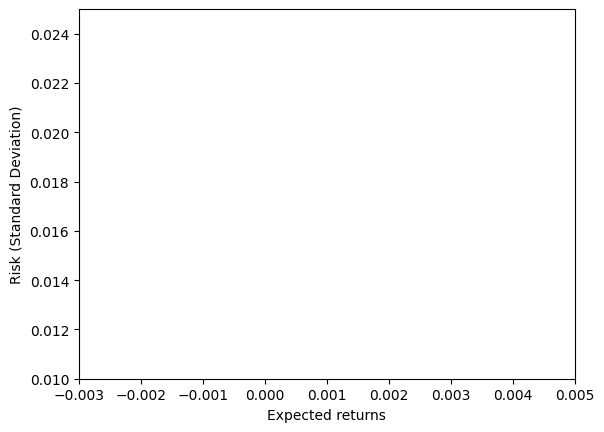

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' contains your stock returns data, rename it to 'tech_returns'
tech_returns = data  # Or use 'rets' if it's already the cleaned data

# Clean the data by dropping NaN values
rets = tech_returns.dropna()

# Define the size of each point in the scatter plot
area = np.pi * 20  # The size of the scatter plot points

# Create the scatter plot with mean returns on the x-axis and standard deviation (risk) on the y-axis
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=area)

# Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk (Standard Deviation)')

# Set the x and y limits of the plot
plt.ylim([0.01, 0.025])  # Limiting the range of risk (y-axis)
plt.xlim([-0.003, 0.005])  # Limiting the range of expected returns (x-axis)

# Label the scatter plot points with the stock names
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(50, 50),  # Position of the label relative to the point
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3')
    )

# Show the plot
plt.show()

# **Value at Risk**

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

*Value at risk using the "bootstrap" method*

For this method we will calculate the empirical quantiles from a histogram of daily returns.



[*********************100%***********************]  1 of 1 completed


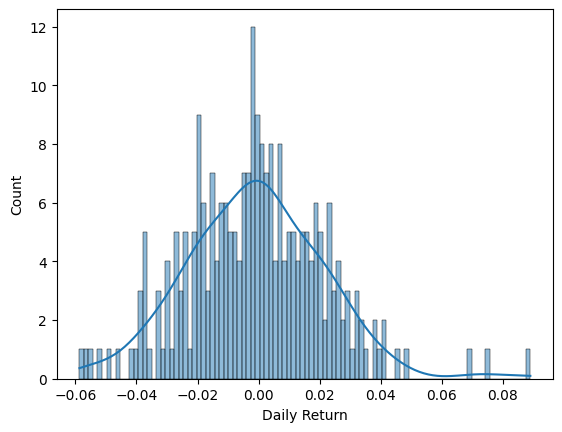

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf # Import the yfinance library

# Download AAPL data using yfinance
AAPL = yf.download('AAPL', start='2022-01-01', end='2023-01-01') # Replace with your desired date range

# Calculate daily returns
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Plot the distribution of AAPL's daily returns, excluding NaN values
sns.histplot(AAPL['Daily Return'].dropna(), bins=100, kde=True)

# Show the plot
plt.show()

*Now we can use quantile to get the risk value for the stock.*

In [66]:
data = data.rename(columns={'Adj Close': 'AAPL_close'})
rets = data.pct_change()

In [63]:
import yfinance as yf
import pandas as pd

# Download data for AAPL
tickers = ['AAPL']
data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# Rename the column to 'AAPL_close'
data = data.rename(columns={'Adj Close': 'AAPL_close'})

# Calculate daily returns
rets = data.pct_change()

# Rename the column after pct_change()
rets = rets.rename(columns={'AAPL': 'AAPL_close'}) # Rename the column here

# The 0.05 empirical quantile of daily returns
emp = rets['AAPL_close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

[*********************100%***********************]  1 of 1 completed

The 0.05 empirical quantile of daily returns is at -0.037317738957510144


The 0.05 empirical quantile of daily returns is at -0.024. That means that with 95% confidence, our worst daily loss will not exceed 2.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.024 * 1,000,000 = $24,000.

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

Firstly, for specifying a model, We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH) - past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation: GBM Equation

Where, S is the stock price,
 is the expected return (which we calculated earlier),
 is the standard deviation of the returns, t is time, and
 is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price. Now GBM Equation

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be. This is simply a way of scaling the standard deviation.

drift-shock

For more info on the Monte Carlo method for stocks, check out the following link: How to use Monte Carlo simulation with GBM



Secondly, to demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame 'GOOG'

In [62]:
import pandas as pd

# Number of days (assuming 365 for simplicity)
days = 365

# Set the time increment deltaT
deltaT = 1 / days

# Assuming you have a DataFrame `rets` with daily returns for Apple ('AAPL_close')
# Example: rets = pd.DataFrame({'AAPL_close': [0.01, -0.02, 0.03, ...]})

# Calculate the drift (expected return) for AAPL_close
# Changed 'GOOG_close' to 'AAPL_close'
mu = rets['AAPL_close'].mean()

# Calculate the volatility (standard deviation of returns) for AAPL_close
# Changed 'GOOG_close' to 'AAPL_close'
sigma = rets['AAPL_close'].std()

print("Days:", days)
print("Delta T:", deltaT)
print("Drift (mu):", mu)
print("Volatility (sigma):", sigma)

Days: 365
Delta T: 0.0027397260273972603
Drift (mu): -0.001073499506909906
Volatility (sigma): 0.022471313965300572


Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we have already calculated from our daily returns



In [61]:
import numpy as np

def monte_carlo_simulation(start_price, days, mu, sigma):
    '''
    This function takes in starting stock price, number of days in the simulation,
    expected return (mu), and volatility (sigma), and returns an array of simulated prices.
    '''

    # Initialize a price array with zeros
    price = np.zeros(days)
    price[0] = start_price  # Set the first price to the starting price

    # Arrays for storing shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    # Time increment
    deltaT = 1 / days

    # Run the simulation for the specified number of days
    for x in range(1, days):

        # Calculate shock (random component based on normal distribution)
        shock[x] = np.random.normal(loc=0, scale=sigma * np.sqrt(deltaT))

        # Calculate drift (deterministic component based on expected return)
        drift[x] = mu * deltaT

        # Update price with the previous price, drift, and shock
        price[x] = price[x-1] * (1 + drift[x] + shock[x])

    return price

# Example usage:
start_price = 100  # Example starting price
days = 365         # Simulation for one year
mu = 0.1           # Example drift (10% expected return)
sigma = 0.2        # Example volatility (20%)

simulated_prices = monte_carlo_simulation(start_price, days, mu, sigma)
print(simulated_prices)

[100.         101.23167981 103.09665953 ... 104.82430266 103.04872308
 100.68476653]


Now let's put our function to work!

In [60]:
import pandas as pd

# Assuming you have a CSV file named 'GOOG_data.csv' with GOOG stock data
# Replace 'GOOG_data.csv' with the actual file name if different or use the 'data' DataFrame
# If 'data' is the DataFrame containing the stock data:
GOOG = data  # Using the existing 'data' DataFrame

# Alternatively, provide the correct file path:
# GOOG = pd.read_csv('/path/to/your/GOOG_data.csv')

# Now you can use GOOG.head()
GOOG.head()

Ticker,AAPL
Date,
2022-01-03 00:00:00+00:00,179.076584
2022-01-04 00:00:00+00:00,176.803818
2022-01-05 00:00:00+00:00,172.100891
2022-01-06 00:00:00+00:00,169.227936
2022-01-07 00:00:00+00:00,169.395187


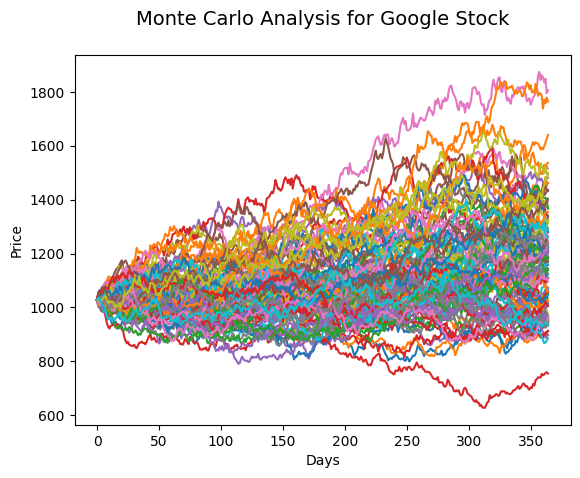

In [59]:
import matplotlib.pyplot as plt # Import the pyplot module for plotting
import numpy as np

def monte_carlo_simulation(start_price, days, mu, sigma):
    '''
    This function takes in starting stock price, number of days in the simulation,
    expected return (mu), and volatility (sigma), and returns an array of simulated prices.
    '''

    # Initialize a price array with zeros
    price = np.zeros(days)
    price[0] = start_price  # Set the first price to the starting price

    # Arrays for storing shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    # Time increment
    deltaT = 1 / days

    # Run the simulation for the specified number of days
    for x in range(1, days):

        # Calculate shock (random component based on normal distribution)
        shock[x] = np.random.normal(loc=0, scale=sigma * np.sqrt(deltaT))

        # Calculate drift (deterministic component based on expected return)
        drift[x] = mu * deltaT

        # Update price with the previous price, drift, and shock
        price[x] = price[x-1] * (1 + drift[x] + shock[x])

    return price

# Example usage:
start_price = 100  # Example starting price
days = 365         # Simulation for one year
mu = 0.1           # Example drift (10% expected return)
sigma = 0.2        # Example volatility (20%)



# Get start price(stock open price) from GOOG.head()
start_price = 1027.27

for run in range(100):
    plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google Stock\n', fontsize = 14)
plt.show()

Get a histogram of the end results for a much larger run.

In [58]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days-1]


Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

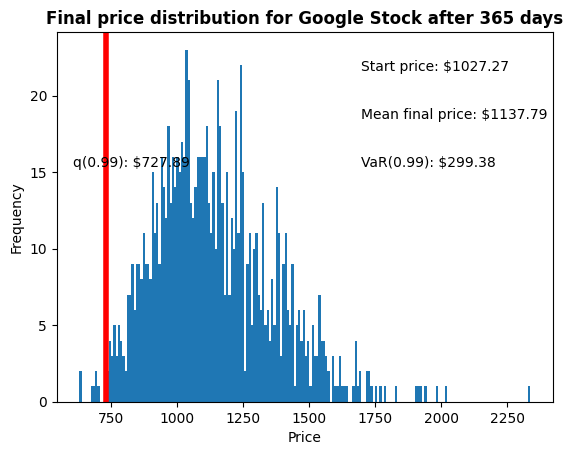

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo Simulation Function (previously defined)

# Parameters
start_price = 1027.27
days = 365
mu = 0.1
sigma = 0.2
simulations = [monte_carlo_simulation(start_price, days, mu, sigma)[-1] for _ in range(1000)]

# 1% empirical quantile (Value at Risk)
q = np.percentile(simulations, 1)

# Plotting the distribution of final prices
plt.hist(simulations, bins=200)
plt.figtext(0.6, 0.8, f"Start price: ${start_price:.2f}")
plt.figtext(0.6, 0.7, f"Mean final price: ${np.mean(simulations):.2f}")
plt.figtext(0.6, 0.6, f"VaR(0.99): ${start_price - q:.2f}")
plt.figtext(0.15, 0.6, f"q(0.99): ${q:.2f}")
plt.axvline(x=q, linewidth=4, color='r')
plt.title(f"Final price distribution for Google Stock after {days} days", weight='bold')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


# **Conclusion**

Conclusion
In this project, we used Monte Carlo simulation to model potential future price paths for Google’s stock (GOOG) over a 1-year period. By simulating multiple scenarios based on historical daily returns and volatility, we could analyze the possible range of end-of-year stock prices and assess the risk of price fluctuations.

# Key Findings


Expected Price Range: The simulation shows a wide range of possible end-of-year prices, illustrating the inherent uncertainty in stock movements.


*Mean Final Price:* Averaging across all simulations, we observed a projected mean final price that offers a baseline expectation of where Google’s stock price might end up in a year.


*Value at Risk (VaR):* The 1% quantile was
used to calculate the Value at Risk (VaR), giving us a threshold below which only 1% of outcomes fall. This serves as a conservative measure of downside risk, showing the potential worst-case scenario at a 99% confidence level.


# Broader Implications


This Monte Carlo simulation approach provides valuable insights into the potential risks and returns associated with investing in Google stock. By generating multiple possible future price paths, we are better equipped to understand the range of possible outcomes, rather than relying on single-point estimates. This methodology can help investors make more informed decisions, especially when considering risk tolerance and long-term investment goals.


In summary, while Google stock shows growth potential, this simulation underscores the importance of considering both the expected returns and possible risks when making investment decisions. This approach can also be applied to other stocks or portfolios, making it a versatile tool for financial risk analysis.



